# Giriş


**Content**

    1. Veri Setini yükle kontrol et
    2. Değişkenleri(feature) analiz et
        - Univariate analiz(Herbir değişkenin tek başına incelenmesi)
            - Kategorik değişkenler
            - Nümerik değişkenler
    3. Basit veri analizi
    4. Outlier tespiti
    5. Kayıp veri analizi
        - Kayıp verileri bul
        - Kayıp verileri doldur
    6. Veri görselleştirme işlemleri
    7. Özellik mühendisliği
    8. Modelleme
        - Train-test split
        - Lineer Regresyon
        - Hiperparametre tuning- Grid search- Cross validation
        -
        - Test

# Kütüphaneleri yükleme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os

* Python'daki " *numpy* " kütüphanesi, çok boyutlu dizilerle (array) ve matrislerle işlem yapmayı sağlar.
* Python'daki " *pandas* " kütüphanesi; veriyi düzenlemek, analiz etmek ve işlemek için kullanılır.
* Python'da " *matplotlib* ", veri görselleştirme için kullanılan bir kütüphanedir. *pyplot* modülü ise, Matplotlib'in temel çizim işlevlerini sağlayan bir alt modüldür.
* " *Counter* ", collections modülünün bir alt sınıfıdır ve bir listedeki öğelerin frekansını saymak için kullanılır.
* " *os* ", Python’un standart kütüphanelerinden biridir ve işletim sistemi ile etkileşim kurmayı sağlar. 

# Veri Setini Yükleme ve Kontrol etme

In [2]:
winemag = pd.read_csv('C:/Users/ASUS/OneDrive/Masaüstü/archive/winemag_130k.csv',nrows=50000)


In [3]:
winemag.columns # DataFrame'in içindeki sütün adlarını çağırır

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [4]:
winemag.head() # DataFrame'in ilk beş satırın çağırır

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
winemag.describe() #DataFrame'in içerisinde bulunan nümerik değerlerin istatistiksel değerini verir

,Unnamed: 0,points,price
count,50000.000000,50000.000000,46469.000000
mean,24999.500000,88.454700,35.364071
std,14433.901067,3.048189,39.659331
min,0.000000,80.000000,4.000000
25%,12499.750000,86.000000,17.000000
50%,24999.500000,88.000000,25.000000
75%,37499.250000,91.000000,42.000000
max,49999.000000,100.000000,2500.000000


# Öznitelik Açıklamaları

1. country: Şarabın üretildiği ülke.
2. description: Şarap hakkında yapılan eleştirmen yorumu veya tanımlaması.
3. designation: Şarabın belirli bir bağ veya etiket adı.
4. points: Şaraba verilen puan, genellikle 80 ile 100 arasında bir ölçek kullanılır.
5. price: Şarabın dolar cinsinden fiyatı.
6. province:Şarabın üretildiği ülkenin eyalet veya bölgesi.
7. region_1: Eyalet/bölge içerisindeki ana şarap üretim bölgesi (örneğin, Napa Vadisi).
8. region_2: region_1 içerisindeki daha spesifik bir alt bölge.
9. taster_name: Yorumlayan kişinin adı.
10. taster_twitter_handle: Yorumlayan kişinin twitter adresi
11. title: Şarabın marka adı, üzüm çeşidi ve yılı gibi bilgileri içerir.
12. variety: Şarap yapımında kullanılan üzüm türü (örneğin, Chardonnay, Merlot).
13. winery: Şarabı üreten şaraphanenin adı

# Kullanılacak Özniteliklerin Seçimi

* Kullanmayacağım öznitelikleri veri setimden çıkardım

In [6]:
winemag.drop(labels=["taster_name"], axis=1, inplace=True)
winemag.drop(labels=["description"], axis=1, inplace=True)
winemag.drop(labels=["taster_twitter_handle"], axis=1, inplace=True)
winemag.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
winemag.drop(labels=["designation"], axis=1, inplace=True)
winemag.drop(labels=["region_1"], axis=1, inplace=True)
winemag.drop(labels=["region_2"], axis=1, inplace=True)

In [7]:
print(winemag.columns)

Index(['country', 'points', 'price', 'province', 'title', 'variety', 'winery'], dtype='object')


In [8]:
winemag.head()

,country,points,price,province,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Univariate Veri Analizi

* Univariate Analiz: Herbir değişken tek başına incelenir. Bu analiz herbir değişkenin dağılımını, merkezi eğilimini, dağılım şeklini ve aykırı değerlerini anlamak için kullanılan yöntemlerden bir tanesidir.

In [9]:
winemag.info() # DataFrame'in temel bilgilerine ulaşır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   49972 non-null  object 
 1   points    50000 non-null  int64  
 2   price     46469 non-null  float64
 3   province  49972 non-null  object 
 4   title     50000 non-null  object 
 5   variety   50000 non-null  object 
 6   winery    50000 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


* Nümerik öznitelikler(3): points, price
* Kategorik öznitelikler(11): country, province, title, variety, winery

# Nümerik Veriler



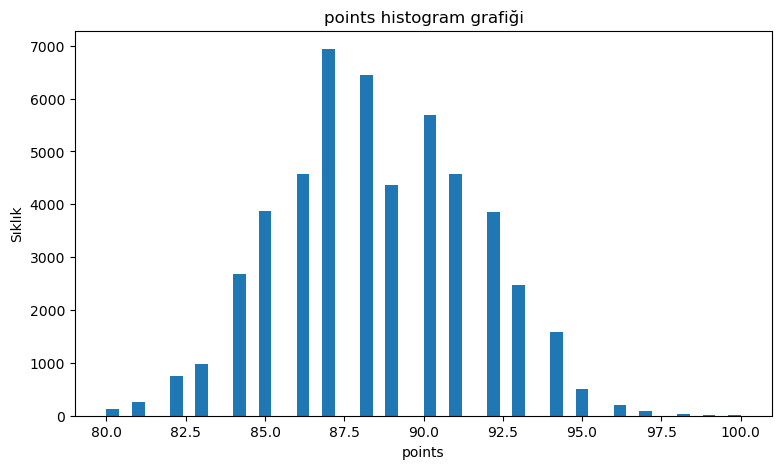

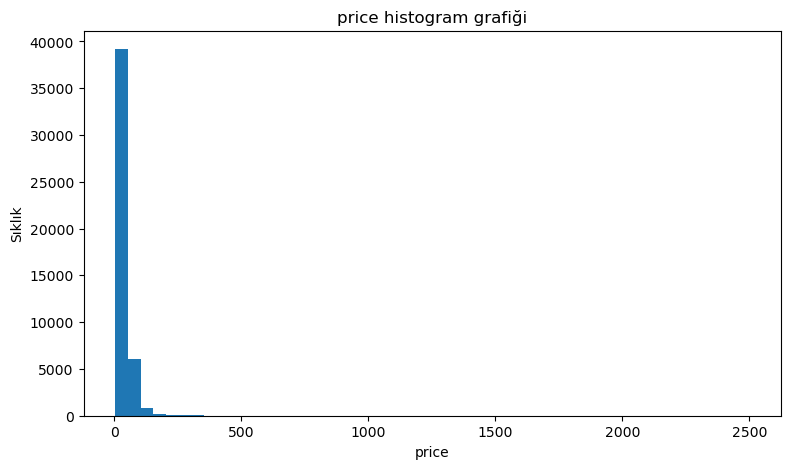

In [10]:
def plot_histogram(variable):
    plt.figure(figsize=(9,5))
    plt.hist(winemag[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Sıklık")
    plt.title("{} histogram grafiği".format(variable))
    plt.show()

numericVar=["points","price"]
for n in numericVar:
    plot_histogram(n)
    

# Temel Veri Analizi 

* country - points: Ülkenin puana etkisi                 
* price - points: Fiyatın puana etkisi                                             
* variety - points: Kullanılan üzüm türünün puana etkisi                
* winery - points: Şaraphanenin puana etkisi              

In [11]:
#country - points
winemag[["country","points"]].groupby(["country"], as_index=False).mean().sort_values(by="points",ascending=False)

,country,points
12,England,91.000000
18,India,90.666667
3,Austria,90.099614
15,Germany,89.922030
17,Hungary,89.500000
36,Switzerland,89.333333
7,Canada,89.213483
26,Morocco,89.000000
13,France,88.858383
2,Australia,88.606229


In [12]:
#price - points
winemag[["price","points"]].groupby(["price"], as_index=False).mean().sort_values(by="points",ascending=False)

,price,points
204,259.0,100.000000
273,800.0,98.500000
280,1900.0,98.000000
143,151.0,98.000000
239,367.0,98.000000
...,...,...
4,8.0,84.711429
3,7.0,84.583815
0,4.0,84.500000
2,6.0,84.367347


In [13]:
#variety - points
winemag[["variety","points"]].groupby(["variety"], as_index=False).mean().sort_values(by="points",ascending=False)

,variety,points
51,Bual,96.5
469,Terrantez,95.0
478,Tinta del Pais,94.0
283,Muscadelle,93.4
345,Pinot Noir-Syrah,93.0
...,...,...
83,Carmenère-Syrah,83.0
3,Aidani,82.0
184,Hondarrabi Zuri,81.5
227,Malvar,81.0


In [14]:
#winery - points
winemag[["winery","points"]].groupby(["winery"], as_index=False).mean().sort_values(by="points",ascending=False)

,winery,points
1689,Cardinale,100.000000
3515,Clos de Tart,98.000000
480,Araujo,98.000000
4607,Domaine des Lambrays,98.000000
10894,Tenuta dell'Ornellaia,96.285714
...,...,...
4927,Eleusis,80.000000
1416,Buzzard Tree,80.000000
11496,Vega Murillo,80.000000
6120,Hermes,80.000000


# Outlier Tespiti


In [15]:
def detect_outliers(df, features):
    outlier_indices=[]
    for c in features:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)
        IQR= Q3-Q1
        outlier_step=IQR *1.5
        outlier_list_col =df[(df[c] < Q1-outlier_step) | (df[c] > Q3+outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v > 2)
    return multiple_outliers

winemag.loc[detect_outliers(winemag, ["points","price"])]

,country,points,price,province,title,variety,winery


# Kayıp Veri Problemi

In [16]:
winemag_len=len(winemag)
print(winemag_len)

50000


### Kayıp Verileri Bulma

In [17]:
winemag.columns[winemag.isnull().any()] # Veri setinde null değer bulunan öznitelikleri gösterir

Index(['country', 'price', 'province'], dtype='object')

In [18]:
winemag.isnull().sum()

country       28
points         0
price       3531
province      28
title          0
variety        0
winery         0
dtype: int64

### Kayıp Verileri Doldurma

In [19]:
from sklearn.linear_model import LinearRegression

# Eksik olmayan verileri kullanarak model oluştur
train_data = winemag.dropna(subset=['price', 'points'])

# Bağımlı ve bağımsız değişkenler
X = train_data[['points']]
y = train_data['price']

# Regresyon modelini oluştur
model = LinearRegression()
model.fit(X, y)

# Eksik fiyatları tahmin etmek için
missing_price_data = winemag[winemag['price'].isnull()]
winemag.loc[winemag['price'].isnull(), 'price'] = model.predict(missing_price_data[['points']])


In [20]:
winemag.isnull().sum()

country     28
points       0
price        0
province    28
title        0
variety      0
winery       0
dtype: int64

# Veri Görselleştirme

<function matplotlib.pyplot.show(close=None, block=None)>

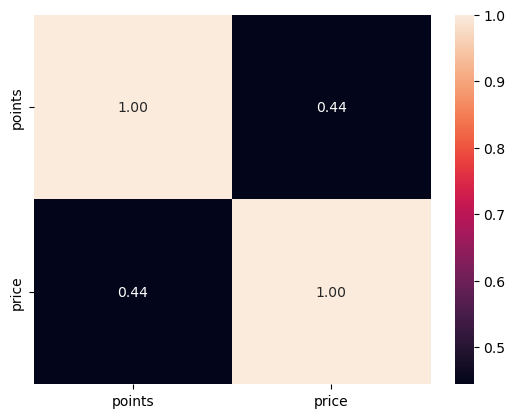

In [22]:
list= ["points","price"]
sns.heatmap(winemag[list].corr(),annot=True,fmt=".2f")
plt.show


# Öznitelik Mühendisliği

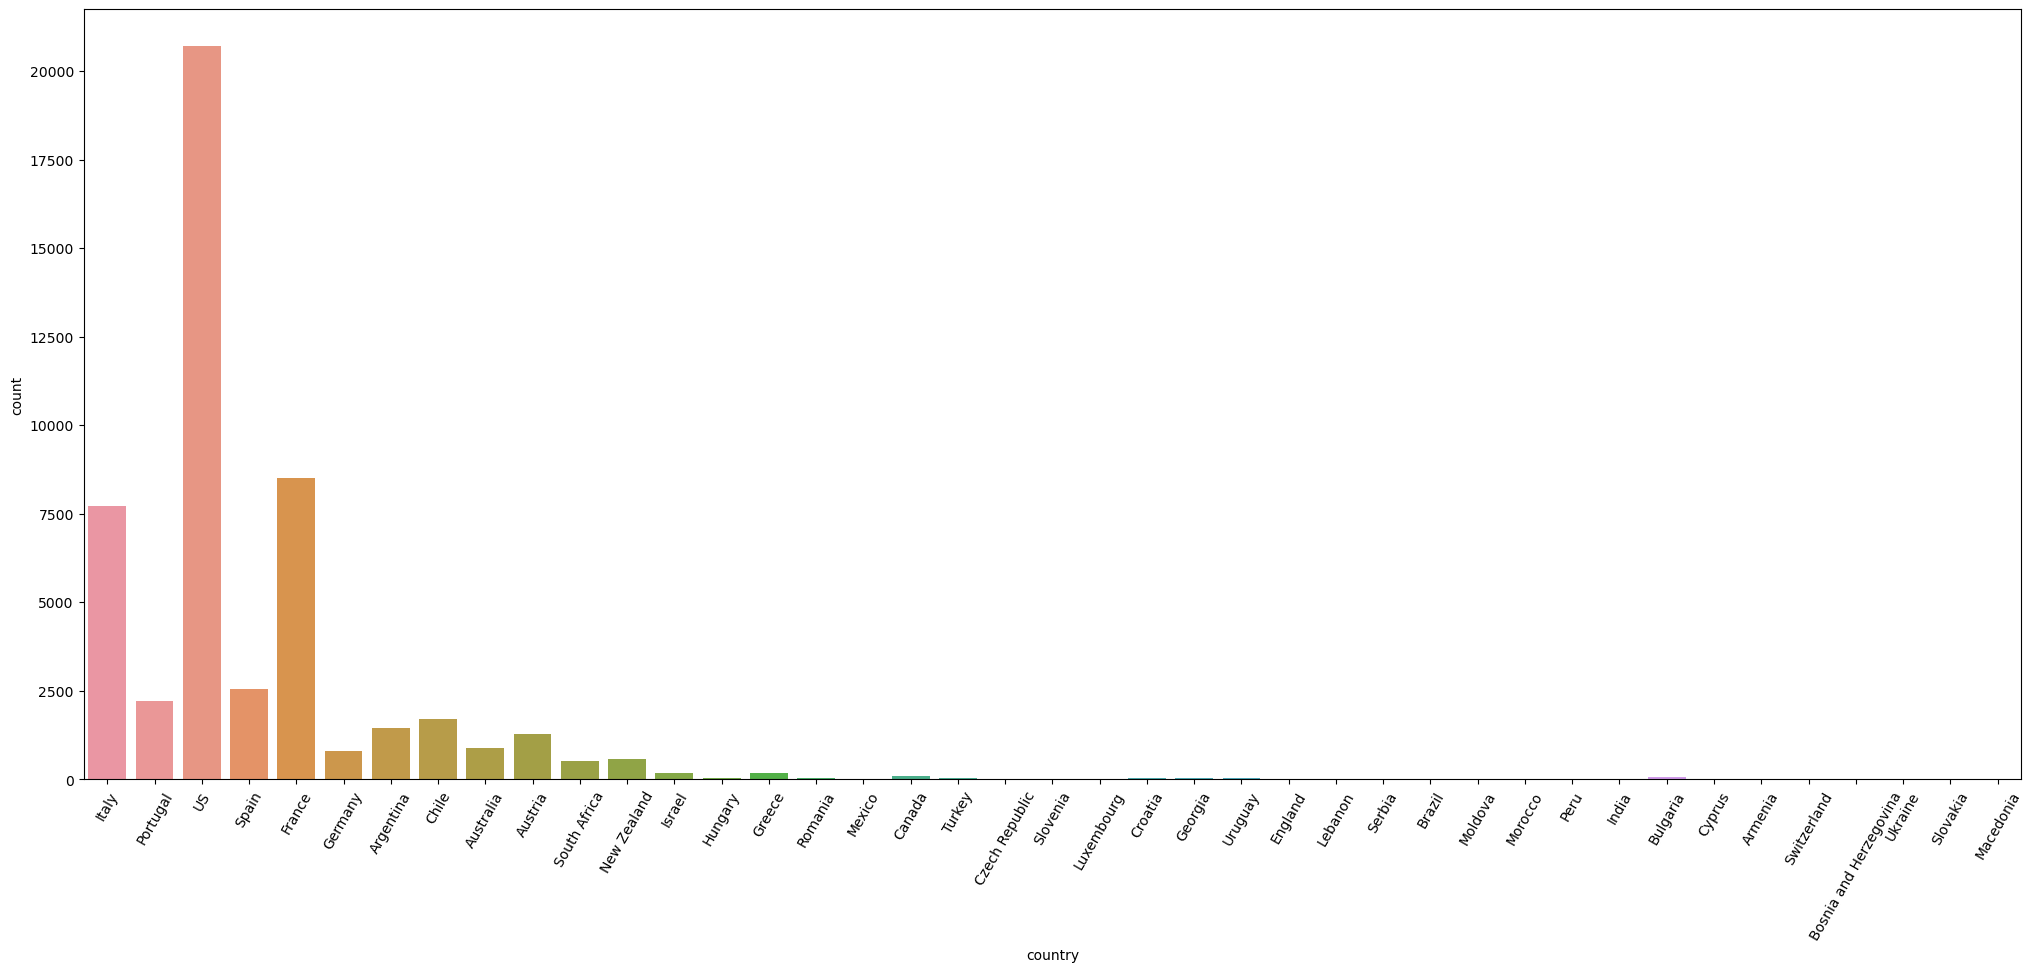

In [23]:
plt.figure(figsize=(25,10)) 
sns.countplot(x="country", data=winemag)
plt.xticks(rotation=60)
plt.show()

* Veri setimiz içerisindeki ülkelerden kaç tane olduğunu bulduk

In [24]:
winemag["country"] = winemag["country"].replace(
    ["Mexico", "Romania", "Hungary", "Czech Republic", "Slovenia", "Luxembourg", "Crotia", "Georgia", "Uruguay", 
     "England", "Lebanon", "Serbia", "Brazil", "Moldova", "Morocco", "Peru", "India", "Bulgaria", "Cyprus", 
     "Armenia", "Switzerland", "Bosnia and Herzegovina", "Slovakia", "Macedonia", "China", "Egypt", "Ukraine"], 
    "other"
)

winemag["country"] = [
    0 if i == "Italy" else 
    1 if i == "Portugal" else 
    2 if i == "US" else 
    3 if i == "Spain" else 
    4 if i == "France" else 
    5 if i == "Germany" else 
    6 if i == "Argentina" else 
    7 if i == "Chile" else 
    8 if i == "Australia" else 
    9 if i == "Austria" else 
    10 if i == "South Africa" else 
    11 if i == "New Zealand" else 
    12 if i == "Israel" else 
    13 if i == "Greece" else 
    14 if i == "Canada" else 
    15 if i == "Turkey" else 
    16  
    for i in winemag["country"]
]


winemag["country"].head(20)


0     0
1     1
2     2
3     2
4     2
5     3
6     0
7     4
8     5
9     4
10    2
11    4
12    2
13    0
14    2
15    5
16    6
17    6
18    3
19    2
Name: country, dtype: int64

* En çok kullanılan 15 tane ülkeye bir sayı atadık ve geriye kalan ülkerleri "other" olarak adlandırarak numaralandırdık

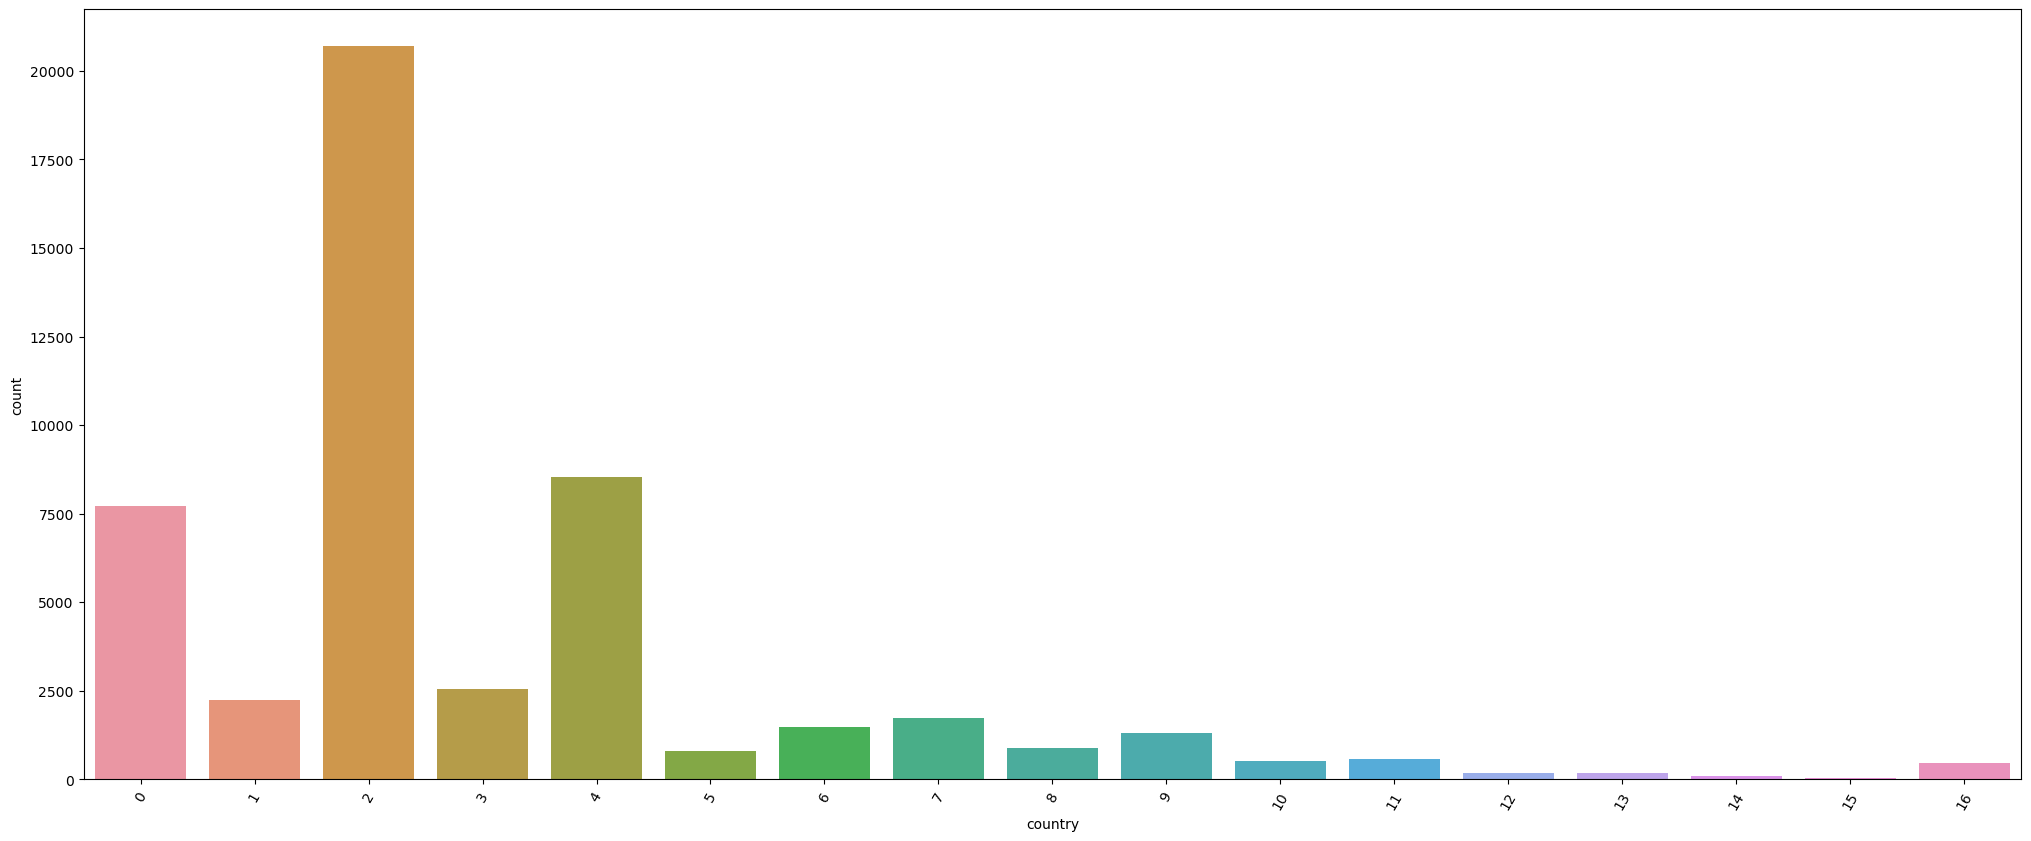

In [25]:
plt.figure(figsize=(25,10)) 
sns.countplot(x="country", data=winemag)
plt.xticks(rotation=60)
plt.show()

<Figure size 5000x500 with 0 Axes>

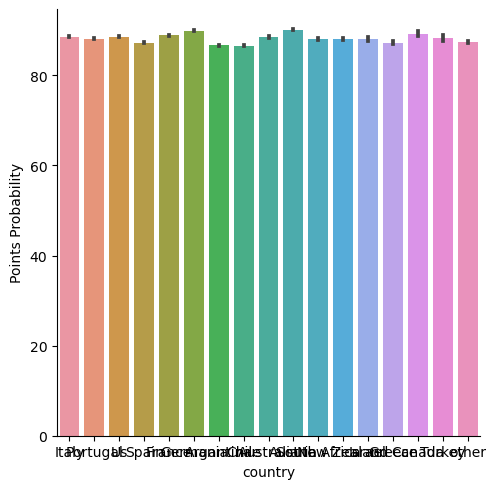

In [26]:
plt.figure(figsize=(50,5)) 
g= sns.catplot(x="country", y="points", data=winemag, kind ="bar")
g.set_xticklabels(["Italy","Portugal","Us","Spain", "France","Germania","Argantina","Chile","Australia","Austria","South Africa","New Zealand", "Israel","Greece","Canada", "Turkey","other"])
g.set_ylabels("Points Probability")
plt.show()

* Ülkelerin aldığı puana göre inceleme

In [27]:
winemag.head()

,country,points,price,province,title,variety,winery
0,0,87,27.329076,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,2,87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,2,87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [28]:
import re
def extract_year(title):
    match = re.search(r'(19[0-9]{2}|20[0-9]{2})', title)
    if match:
        return int(match.group(0))
    return None

winemag['year'] = winemag['title'].apply(extract_year)

winemag['year'].fillna(0, inplace=True)
winemag['year'] = winemag['year'].astype(int)


print(winemag[['title', 'year']].head())


                                               title  year
0                  Nicosia 2013 Vulkà Bianco  (Etna)  2013
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  2011
2      Rainstorm 2013 Pinot Gris (Willamette Valley)  2013
3  St. Julian 2013 Reserve Late Harvest Riesling ...  2013
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...  2012


* "title" özniteliğindeki yıl bilgisini çıkararak yen bir öznitelik sütunu ("year") ekledik.

In [29]:
winemag.head()

,country,points,price,province,title,variety,winery,year
0,0,87,27.329076,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,1,87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,2,87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,2,87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,2,87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [30]:
winemag.drop(labels=["title"], axis=1, inplace=True) # "title" özniteliğini kaldırdık

In [31]:
winemag.head()

,country,points,price,province,variety,winery,year
0,0,87,27.329076,Sicily & Sardinia,White Blend,Nicosia,2013
1,1,87,15.000000,Douro,Portuguese Red,Quinta dos Avidagos,2011
2,2,87,14.000000,Oregon,Pinot Gris,Rainstorm,2013
3,2,87,13.000000,Michigan,Riesling,St. Julian,2013
4,2,87,65.000000,Oregon,Pinot Noir,Sweet Cheeks,2012


<function matplotlib.pyplot.show(close=None, block=None)>

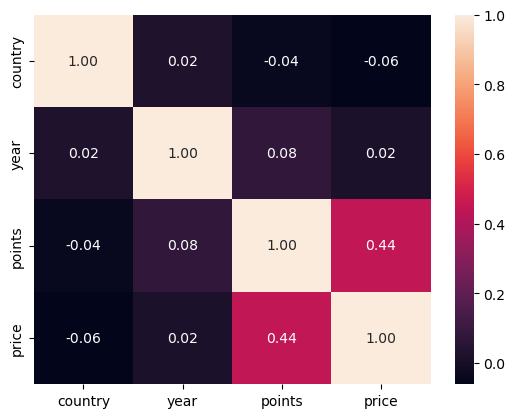

In [32]:
list= ["country", "year",  "points","price"]
sns.heatmap(winemag[list].corr(),annot=True,fmt=".2f")
plt.show


In [33]:
winemag =pd.get_dummies(winemag, columns=["country"])
winemag.head()

,points,price,province,variety,winery,year,country_0,country_1,country_2,country_3,...,country_7,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16
0,87,27.329076,Sicily & Sardinia,White Blend,Nicosia,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,15.000000,Douro,Portuguese Red,Quinta dos Avidagos,2011,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,14.000000,Oregon,Pinot Gris,Rainstorm,2013,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,87,13.000000,Michigan,Riesling,St. Julian,2013,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,87,65.000000,Oregon,Pinot Noir,Sweet Cheeks,2012,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


* pd.get_dummies yöntemi, pandas kütüphanesinde kullanılan ve kategorik verileri sayısal verilere dönüştüren bir işlevdir. 

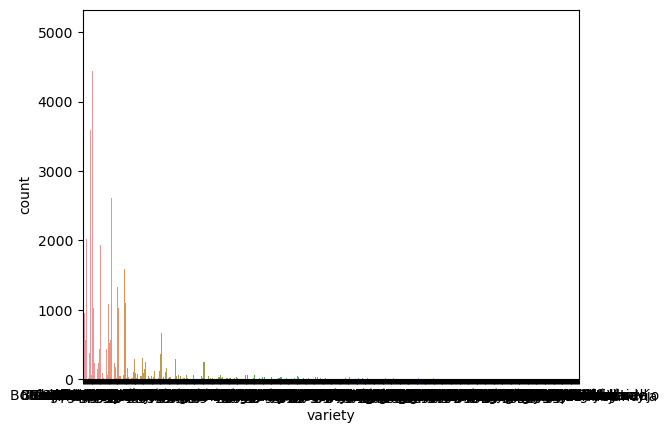

In [34]:
sns.countplot(x="variety", data=winemag)
plt.show()

In [35]:
top_50_varieties = winemag['variety'].value_counts().nlargest(50).index

winemag['variety'] = winemag['variety'].apply(lambda x: x if x in top_50_varieties else 'other')


variety_mapping = {variety: idx for idx, variety in enumerate(top_50_varieties)}

variety_mapping['other'] = 50


winemag['variety_num'] = winemag['variety'].map(variety_mapping)

print(winemag[['variety', 'variety_num']].head(20))


               variety  variety_num
0          White Blend           15
1       Portuguese Red           14
2           Pinot Gris           19
3             Riesling            5
4           Pinot Noir            0
5                other           50
6                other           50
7       Gewürztraminer           27
8       Gewürztraminer           27
9           Pinot Gris           19
10  Cabernet Sauvignon            2
11      Gewürztraminer           27
12  Cabernet Sauvignon            2
13               other           50
14          Chardonnay            1
15            Riesling            5
16              Malbec           13
17              Malbec           13
18   Tempranillo Blend           38
19               other           50


In [36]:
winemag.head()

,points,price,province,variety,winery,year,country_0,country_1,country_2,country_3,...,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,variety_num
0,87,27.329076,Sicily & Sardinia,White Blend,Nicosia,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,87,15.000000,Douro,Portuguese Red,Quinta dos Avidagos,2011,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
2,87,14.000000,Oregon,Pinot Gris,Rainstorm,2013,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19
3,87,13.000000,Michigan,Riesling,St. Julian,2013,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
4,87,65.000000,Oregon,Pinot Noir,Sweet Cheeks,2012,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Variety sütununu one-hot encoding ile dummies haline getirme işlemi
variety_dummies = pd.get_dummies(winemag['variety'], prefix='variety')

In [38]:
winemag.head()

,points,price,province,variety,winery,year,country_0,country_1,country_2,country_3,...,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,variety_num
0,87,27.329076,Sicily & Sardinia,White Blend,Nicosia,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,87,15.000000,Douro,Portuguese Red,Quinta dos Avidagos,2011,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
2,87,14.000000,Oregon,Pinot Gris,Rainstorm,2013,0,0,1,0,...,0,0,0,0,0,0,0,0,0,19
3,87,13.000000,Michigan,Riesling,St. Julian,2013,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
4,87,65.000000,Oregon,Pinot Noir,Sweet Cheeks,2012,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
winemag.drop(labels=["variety"], axis=1, inplace=True)

In [40]:
winemag.head()

,points,price,province,winery,year,country_0,country_1,country_2,country_3,country_4,...,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,variety_num
0,87,27.329076,Sicily & Sardinia,Nicosia,2013,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,87,15.000000,Douro,Quinta dos Avidagos,2011,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,14
2,87,14.000000,Oregon,Rainstorm,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,19
3,87,13.000000,Michigan,St. Julian,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,87,65.000000,Oregon,Sweet Cheeks,2012,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
top_50_values = winemag['winery'].value_counts().nlargest(50).index

winemag['winery'] = winemag['winery'].apply(lambda x: x if x in top_50_values else 'other')

value_mapping = {value: idx for idx, value in enumerate(top_50_values)}
value_mapping['other'] = len(top_50_values)  # "other" için bir numara ekle

winemag['winery_num'] = winemag['winery'].map(value_mapping)



In [42]:
winemag.head()

,points,price,province,winery,year,country_0,country_1,country_2,country_3,country_4,...,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,variety_num,winery_num
0,87,27.329076,Sicily & Sardinia,other,2013,1,0,0,0,0,...,0,0,0,0,0,0,0,0,15,50
1,87,15.000000,Douro,other,2011,0,1,0,0,0,...,0,0,0,0,0,0,0,0,14,50
2,87,14.000000,Oregon,other,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,0,19,50
3,87,13.000000,Michigan,other,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,50
4,87,65.000000,Oregon,other,2012,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,50


In [43]:

top_50_values = winemag['province'].value_counts().nlargest(50).index

winemag['province'] = winemag['province'].apply(lambda x: x if x in top_50_values else 'other')

value_mapping = {value: idx for idx, value in enumerate(top_50_values)}
value_mapping['other'] = len(top_50_values)  # "other" için bir numara ekle

winemag['province_num'] = winemag['province'].map(value_mapping)



In [44]:
winemag.head()

,points,price,province,winery,year,country_0,country_1,country_2,country_3,country_4,...,country_10,country_11,country_12,country_13,country_14,country_15,country_16,variety_num,winery_num,province_num
0,87,27.329076,Sicily & Sardinia,other,2013,1,0,0,0,0,...,0,0,0,0,0,0,0,15,50,12
1,87,15.000000,Douro,other,2011,0,1,0,0,0,...,0,0,0,0,0,0,0,14,50,19
2,87,14.000000,Oregon,other,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,19,50,4
3,87,13.000000,other,other,2013,0,0,1,0,0,...,0,0,0,0,0,0,0,5,50,50
4,87,65.000000,Oregon,other,2012,0,0,1,0,0,...,0,0,0,0,0,0,0,0,50,4


In [45]:
winemag.drop(labels=["province"], axis=1, inplace=True)
winemag.drop(labels=["winery"], axis=1, inplace=True)

winemag.head()

,points,price,year,country_0,country_1,country_2,country_3,country_4,country_5,country_6,...,country_10,country_11,country_12,country_13,country_14,country_15,country_16,variety_num,winery_num,province_num
0,87,27.329076,2013,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,50,12
1,87,15.000000,2011,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,14,50,19
2,87,14.000000,2013,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,19,50,4
3,87,13.000000,2013,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,50,50
4,87,65.000000,2012,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,50,4


# Modelleme

In [46]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Train - Test Split

In [47]:
train =winemag[:winemag_len]
X_train= train.drop(labels="points",axis=1)
y_train = train["points"]
X_train,X_test, y_train, y_test= train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  33500
X_test:  16500
y_train:  33500
y_test:  16500


# Lojistik Regresyon

In [48]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train= round(logreg.score(X_train, y_train)*100,2)
acc_log_test= round(logreg.score(X_test, y_test)*100,2)
print("Training accuracy: % {}".format(acc_log_train) )
print("Test accuracy: % {}".format(acc_log_test) )

Training accuracy: % 17.26
Test accuracy: % 17.19


Hiperparametre Ayarlaması

In [53]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)  # Verinin %20'sini kullan


random_state = 42
classifiers = [
    DecisionTreeClassifier(random_state=random_state),
    SVC(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(random_state=random_state),
    KNeighborsClassifier()
]


dt_param_grid = {
    "min_samples_split": range(20, 60, 10), 
    "max_depth": range(2, 8, 2)
}

svc_param_grid = {
    "kernel": ["rbf"],
    "gamma": [0.01, 0.1],
    "C": [1, 10]  
}

rf_param_grid = {
    "max_features": [3],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "bootstrap": [True],
    "n_estimators": [100],  
    "criterion": ["gini"]
}

logreg_param_grid = {
    "C": np.logspace(-2, 2, 3),  
    "penalty": ["l2"]  
}

knn_param_grid = {
    "n_neighbors": np.linspace(3, 7, 3, dtype=int).tolist(),  
    "weights": ["uniform"],
    "metric": ["euclidean"]
}

classifier_param = [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid
]
cv_result = []
best_estimators = []

for i in range(len(classifiers)):
    clf = RandomizedSearchCV(classifiers[i], param_distributions=classifier_param[i], 
                             cv=StratifiedKFold(n_splits=5), scoring="accuracy", 
                             n_jobs=-1, verbose=1, n_iter=5, random_state=random_state)
    clf.fit(X_train_sample, y_train_sample) 
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(f"Model {i} için en iyi doğruluk skoru: {cv_result[i]}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Model 0 için en iyi doğruluk skoru: 0.23179104477611942
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model 1 için en iyi doğruluk skoru: 0.19328358208955226
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Model 2 için en iyi doğruluk skoru: 0.19671641791044775
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model 3 için en iyi doğruluk skoru: 0.1770149253731343
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model 4 için en iyi doğruluk skoru: 0.1646268656716418


In [54]:
cv_results=pd.DataFrame({"Cross validation Accuracy Means": cv_result, "ML Models":["DecisionTreeClassifier","SVM","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})
cv_results

,Cross validation Accuracy Means,ML Models
0,0.231791,DecisionTreeClassifier
1,0.193284,SVM
2,0.196716,RandomForestClassifier
3,0.177015,LogisticRegression
4,0.164627,KNeighborsClassifier


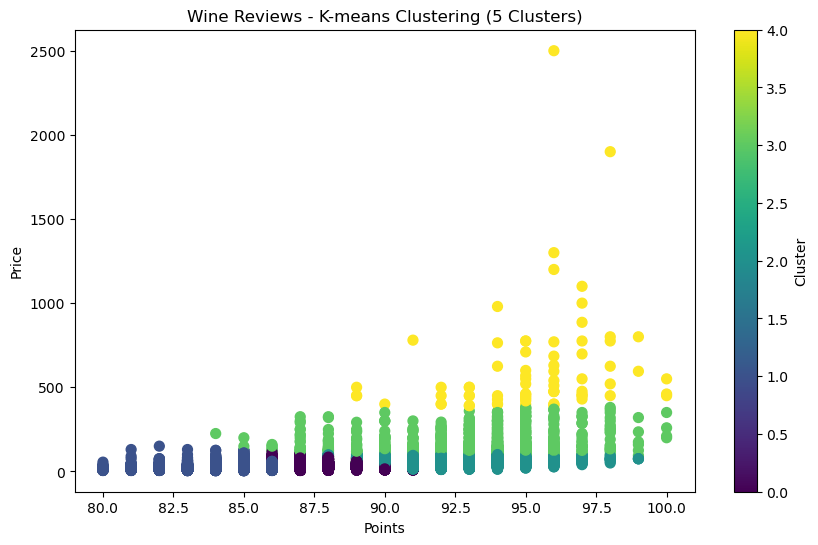

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Veri kümesini yükleyelim
winemag_subset = pd.read_csv('C:/Users/ASUS/OneDrive/Masaüstü/archive/winemag_130k.csv',nrows=50000)


# İlgili sütunları seçelim
# K-means için sayısal özellikler kullanacağız. Örneğin 'points' ve 'price' sütunları.
X = winemag_subset[['points', 'price']].dropna()  # NaN değerleri çıkaralım

# Veriyi standardize edelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means kümeleme algoritmasını uygulayalım
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 küme varsayımı
kmeans.fit(X_scaled)

# Kümeleri tahmin edelim
clusters = kmeans.predict(X_scaled)

# Sonuçları görselleştirelim
plt.figure(figsize=(10, 6))
plt.scatter(X['points'], X['price'], c=clusters, s=50, cmap='viridis')
plt.title("Wine Reviews - K-means Clustering (5 Clusters)")
plt.xlabel('Points')
plt.ylabel('Price')
plt.colorbar(label='Cluster')
plt.show()
